# **Sujet d'enquête: Détection de diabète grâce à l'apprentissage automatique**

# **1. Compréhension et exploration du dataset**

Dans ce point, nous allons traiter les points ci-dessus
*   Chargement des données
*   Analyse initiale



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandarScalerm
import scipy.stats as stats

#    **Analyse initiale** :


      *   Inspectons les dimensions et les types de données (.shape, .info(), .head(), dataset.describe()).
      *   Identifions les variables importantes pour la détection des diabètes (âge, Glucose, Insulin, BMI, etc...).:

In [3]:
#Importation du Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Knowledge/Diabetes/diabetes.csv", sep=";")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Ici nous avons analysé le dimension de notre jeu de donnée
dataset.shape

(768, 9)

In [5]:
 #Obtenir des informations sur les types de données et les valeurs manquantes
#print(dataset.info())
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Voici les differents variables de notre  dataset :**

Types de Variables et leurs Rôles

 **1. Pregnancies**

**Type** : Numérique (entier)

**Rôle** : Variable explicative. Elle représente le nombre de grossesses.

**Interprétation** : Un facteur biologique influençant le risque de diabète, particulièrement chez les femmes ayant eu plusieurs grossesses.

**2. Glucose**

**Type** : Numérique (entier)

**Rôle** : Variable explicative. Représente le niveau de glucose dans le plasma après une période de jeûne.
**Interprétation** : Une mesure critique pour diagnostiquer le diabète. Les niveaux anormalement élevés signalent une possible résistance à l'insuline.
BloodPressure

**Type** : Numérique (entier)

**Rôle** : Variable explicative. Représente la pression artérielle diastolique (en mm Hg).

**Interprétation** : Une hypertension peut être un indicateur indirect du diabète.

**3. SkinThickness**

**Type** : Numérique (entier)

**Rôle** : Variable explicative. Représente l'épaisseur du pli cutané (en mm).

**Interprétation** : Une mesure indirecte du pourcentage de graisse corporelle.

**4. Insulin**

**Type** : Numérique (entier)

**Rôle** : Variable explicative. Indique le niveau d'insuline dans le sang après jeûne (en μU/mL).

**Interprétation** : Une insuline élevée peut indiquer une résistance à l'insuline.

**5. BMI (Body Mass Index)**

**Type** : Numérique (flottant)
**Rôle** : Variable explicative. C'est une mesure du poids corporel par rapport à la taille (kg/m²).

**Interprétation** : Un indice de masse corporelle élevé est souvent associé à un risque accru de diabète.

**6. DiabetesPedigreeFunction**

**Type** : Numérique (flottant)

**Rôle** : Variable explicative. Mesure la fonction de l'hérédité du diabète.

**Interprétation** : Une valeur élevée indique une prédisposition familiale au diabète.

**7. Age**

**Type** : Numérique (entier)

**Rôle** : Variable explicative. Représente l'âge de l'individu en années.

**8.Interprétation** : L'âge est un facteur de risque important pour le diabète.

**9. Outcome**

**Type** : Catégorique (binaire : 0 ou 1)

**Rôle** : Variable cible. 0 indique l'absence de diabète et 1 indique sa présence.

**Interprétation** : La variable à prédire pour évaluer le risque de diabète chez les patients.

***Nous présentons notre target:***

▶ **Outcome**

In [7]:
dataset.Outcome.unique()
print(dataset.Outcome.unique())

[1 0]


**Dans notre dataset, nous avons 768 individus et 9 variables**

In [8]:
dataset.Outcome.value_counts()
print(dataset.Outcome.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


# **Visualisation exploratoire**

▶ ***Distribution des classes***

<ipython-input-9-6188ec0abb93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Outcome', palette='Set2')


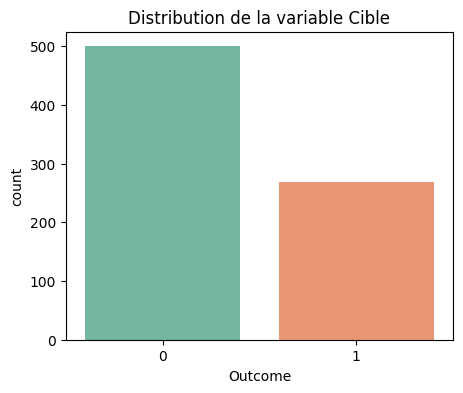

In [9]:
# Distribution de la variable cible (Sleep Disorder)
plt.figure(figsize=(5, 4))
sns.countplot(data=dataset, x='Outcome', palette='Set2')
plt.title("Distribution de la variable Cible")
plt.show()

***Nous utilisons un pairplot pour visualiser la distribution de l'ensemble de nos variables.***

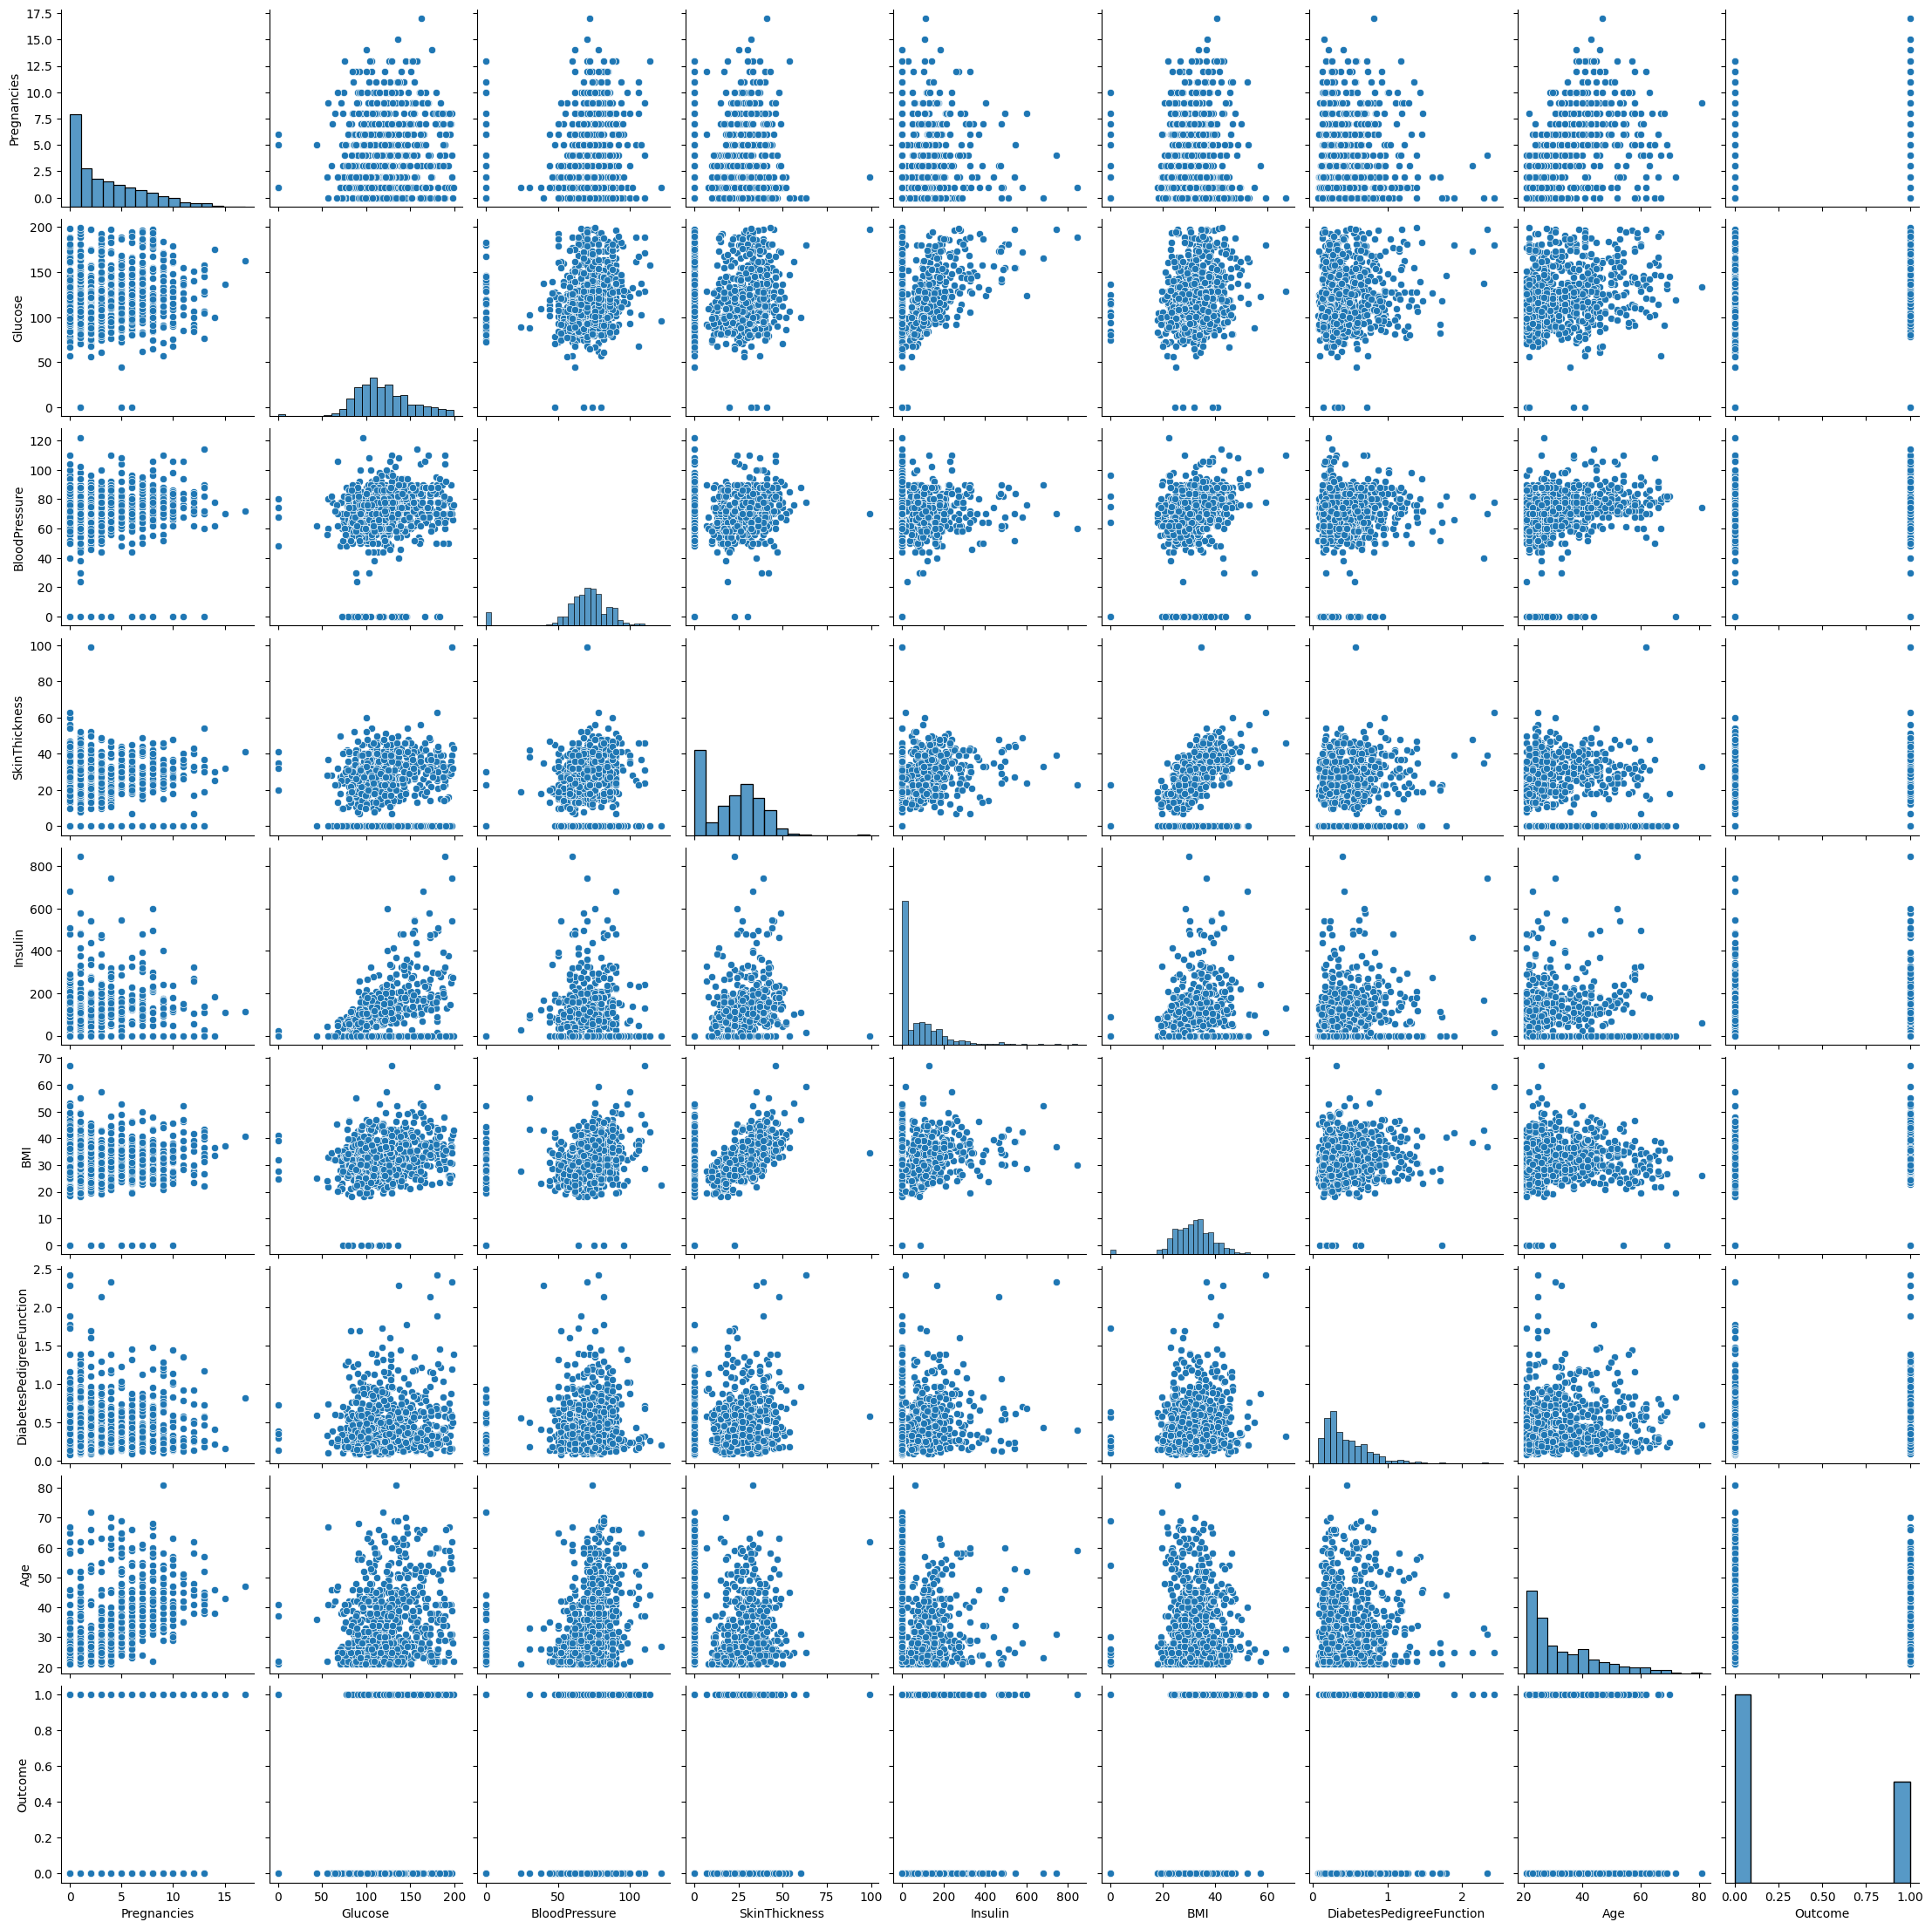

In [10]:
#Rélation entre les variables quatitatives
sns.pairplot(dataset)

# **Analyse bivariée :**

▶ **Corrélations entre les variables**

<Axes: >

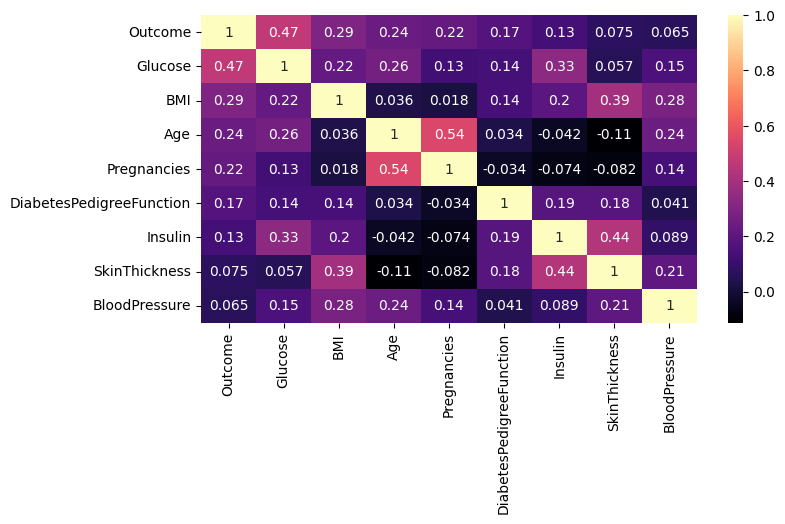

In [11]:
#Correlation Matrix
k = 9
cols = dataset.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = dataset[cols].corr()
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, cmap = 'magma')

In [12]:
dataset.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# **2. Data Preprocessing**

# **Analyse des valeurs manquantes**

Nombre de valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


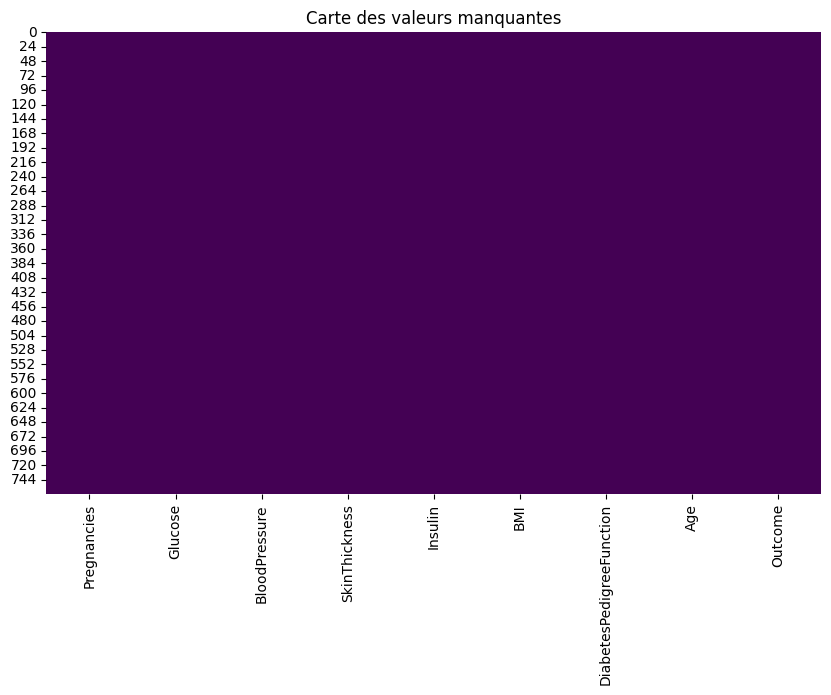

In [13]:
# Vérifier les valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(dataset.isnull().sum())

# Visualiser les valeurs manquantes (optionnel)
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()

In [14]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
# dataset.isnull().sum()
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


 ***Nous allons faire le remplissage des valeurs manquantes de manière adaptée à la variable cible (Outcome), dans chaque colonne explicative qui possède les valeurs manquantes en utilisation la médiane qui séra calculée séparément pour chaque classe de la variable dépendante.***

 ***Nous avions utilisé cette approche sur base de la réalité de notre dataset qui contient une variable dépendante qui influence directement sur les distributions des variables indépendantes.***

In [18]:
def median_target(var):
    temp = dataset[dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    dataset.loc[(dataset['Outcome'] == 0 ) & (dataset[i].isnull()), i] = median_target(i)[i][0]
    dataset.loc[(dataset['Outcome'] == 1 ) & (dataset[i].isnull()), i] = median_target(i)[i][1]

In [19]:
# print(dataset.head())
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1
767,1,93.0,70.0,31.0,102.5,30.4,0.315,23,0


In [21]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [22]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    else:
        print(variable, "no")

In [23]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [24]:
for col in dataset.columns:
    has_outliers(dataset,col)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [25]:
replace_with_thresholds(dataset, dataset.columns)

<ipython-input-23-638dfeaee486>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
<ipython-input-23-638dfeaee486>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
<ipython-input-23-638dfeaee486>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [26]:
for col in dataset.columns:
    has_outliers(dataset, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [27]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0


In [28]:
dataset.shape

(768, 9)

# **3. Features engineering**

**Dans cette section, nous allons créer de nouvelles variables en fonction de certaines variables indépendantes de notre ensemble de données. Nous visons à augmenter la performance de prédiction du modèle avec les variables que nous allons créées par de fusion entre variables indépendantes pour que nous ayons des améliorations dans les différentes corrélations.**

**Toutes fois, nous dévons savoir que l'apprentissage automatique n'est pas détérministe mais elle relève  de la probabilité détérministe,** **D'où l'objectif d'un modèle de machine learning est de trouver la bonne approximation,** **ces approximtions proviennent en établissements des corrélations entre les observations passées(dataset).**

**Tout en admettant que ces corrélations demeurent vraies dans les futur, sur base de ces corrélations les algorithmes de machine learning pourront les utiliser pour faire des prédictions.**

In [29]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

dataset["NewBMI"] = NewBMI

dataset.loc[dataset["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
dataset.loc[(dataset["BMI"] > 18.5) & (dataset["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
dataset.loc[(dataset["BMI"] > 24.9) & (dataset["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
dataset.loc[(dataset["BMI"] > 29.9) & (dataset["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
dataset.loc[(dataset["BMI"] > 34.9) & (dataset["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
dataset.loc[dataset["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [30]:
dataset.loc[(dataset.Outcome == 1) & (dataset.Insulin <= 100) , "Insulin"] = 70
dataset.loc[(dataset.Outcome == 0) & (dataset.Insulin >= 200 ) , "Insulin"] = 200
dataset.loc[(dataset.Outcome == 0) & (dataset.Glucose >= 175 ) , "Glucose"] = 175
dataset.loc[(dataset.Outcome == 1) & (dataset.Glucose <= 80 ) , "Glucose"] = 80
dataset.loc[(dataset.Outcome == 0) & (dataset.Pregnancies >= 13 ) , "Pregnancies"] = 13
dataset.loc[(dataset.Outcome == 0) & (dataset.DiabetesPedigreeFunction >= 1.3 ) , "DiabetesPedigreeFunction"] = 1.3
dataset.loc[(dataset.Outcome == 0) & (dataset.BMI >= 50 ) , "BMI"] = 50
dataset["NEW_g_p"] = (dataset.Glucose * dataset.Pregnancies)
dataset["NEW_i_g"] = (dataset.Glucose * dataset.Insulin)

In [31]:
dataset['New_Glucose'] = pd.cut(x=dataset['Glucose'], bins=[0,74,99,139,200],labels = ["Low","Normal","Overweight","High"])

In [32]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [33]:
dataset = dataset.assign(NewInsulinScore=dataset.apply(set_insulin, axis=1))

**▶ Nous voyons l'ajout des variables features**

In [34]:
dataset.shape

(768, 14)

In [35]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NEW_g_p,NEW_i_g,New_Glucose,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Obesity 1,888.0,25086.0,High,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Overweight,85.0,8712.5,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Normal,1464.0,31018.5,High,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Overweight,89.0,8366.0,Normal,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3,0.0,23016.0,Overweight,Abnormal
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30.0,0.0,Overweight,580.0,11890.0,Overweight,Normal
6,3.0,80.0,50.0,32.0,70.0,31.0,0.248,26.0,1.0,Obesity 1,240.0,5600.0,Normal,Normal
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29.0,0.0,Obesity 2,1150.0,11787.5,Overweight,Normal
8,2.0,197.0,70.0,42.5,270.0,30.5,0.158,53.0,1.0,Obesity 1,394.0,53190.0,High,Abnormal
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54.0,1.0,Obesity 1,1000.0,21187.5,Overweight,Abnormal


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    float64 
 9   NewBMI                    768 non-null    category
 10  NEW_g_p                   768 non-null    float64 
 11  NEW_i_g                   768 non-null    float64 
 12  New_Glucose               768 non-null    category
 13  NewInsulinScore           768 non-null    object  

# **4. One-Hot Encoding**

Est une méthode utilisée pour convertir des données catégorielles (non numériques) en une représentation binaire compréhensible par les modèles d'apprentissage automatique, pour une meilleure exploitation de données.

In [37]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)

    # Application du One-Hot Encoding
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)

    # Convertir explicitement les colonnes en type entier pour garantir 0/1
    for col in dataframe.columns:
        if dataframe[col].dtype == 'bool':  # Conversion si le type est booléen
            dataframe[col] = dataframe[col].astype(int)

    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [38]:
# Sélection des colonnes catégorielles
categorical_columns = [col for col in dataset.columns
                           if len(dataset[col].unique()) <= 10
                      and col != "Outcome"]

# Application de la fonction One-Hot Encoding
dataset, new_cols_ohe = one_hot_encoder(dataset, categorical_columns)

# Afficher les nouvelles colonnes créées
print(new_cols_ohe)


['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'New_Glucose_Normal', 'New_Glucose_Overweight', 'New_Glucose_High', 'NewInsulinScore_Normal']


In [39]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_g_p,NEW_i_g,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_High,NewInsulinScore_Normal
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,888.0,25086.0,1,0,0,0,0,0,0,1,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,85.0,8712.5,0,0,0,1,0,1,0,0,1
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,1464.0,31018.5,0,0,0,0,0,0,0,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,89.0,8366.0,0,0,0,1,0,1,0,0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,0.0,23016.0,0,0,1,0,0,0,1,0,0


In [40]:
y = dataset["Outcome"]
X = dataset.drop(["Outcome"], axis=1) # Only drop 'Outcome' initially
# Get a list of columns to drop after one-hot encoding
cols_to_drop = [col for col in X.columns if col.startswith('NewBMI_') or col.startswith('NewInsulinScore_') or col.startswith('New_Glucose_')]
# Remove those columns, excluding the base categories if they were dropped during one-hot encoding
X = X.drop(columns=[col for col in cols_to_drop if col in X.columns])
cols = X.columns
index = X.index

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,888.0,25086.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,85.0,8712.5
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1464.0,31018.5
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,89.0,8366.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,0.0,23016.0


La normalisation d'un ensemble de données est une nécessité régulière pour beaucoup d'estimateurs en apprentissage automatique. Généralement, on procède par la suppression de la moyenne et son ajustement à la variance unitaire.
Robust Scaler élimine la médiane et modifie les informations en se basant sur le intervalle quantile (par défaut, IQR : Interquartile Range). La fourchette entre le premier quartile (25e quantile) et le troisième quartile (75e quantile) est appelée IQR. On conserve ensuite les plages médianes et interquartiles afin de pouvoir les utiliser sur des données futures grâce à la méthode de transformation.



In [42]:
from sklearn.preprocessing import RobustScaler # Import the RobustScaler class

transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [43]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,0.914929,0.866965
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,-0.424520,-0.418138
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,1.875730,1.332588
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,-0.417848,-0.445334
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,2.163399,0.235294,-0.566305,0.704497


In [44]:
print("Colonnes après One-Hot Encoding :")
print(dataset.columns)


Colonnes après One-Hot Encoding :
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NEW_g_p',
       'NEW_i_g', 'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'New_Glucose_Normal',
       'New_Glucose_Overweight', 'New_Glucose_High', 'NewInsulinScore_Normal'],
      dtype='object')


In [45]:
# Renommer les colonnes pour supprimer les suffixes inutiles
dataset.rename(columns=lambda x: x.replace('_True_1_1', ''), inplace=True)

# Vérifier les nouvelles colonnes
print("Colonnes après renommage :")
print(dataset.columns)


Colonnes après renommage :
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NEW_g_p',
       'NEW_i_g', 'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'New_Glucose_Normal',
       'New_Glucose_Overweight', 'New_Glucose_High', 'NewInsulinScore_Normal'],
      dtype='object')


In [46]:
categorical_df = dataset[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','New_Glucose_Normal', 'New_Glucose_Overweight', 'New_Glucose_High']]
X = pd.concat([X, categorical_df], axis=1)


In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_High
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,0.914929,0.866965,1,0,0,0,0,0,0,0,1
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,-0.424520,-0.418138,0,0,0,1,0,1,1,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,1.875730,1.332588,0,0,0,0,0,0,0,0,1
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,-0.417848,-0.445334,0,0,0,1,0,1,1,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,2.163399,0.235294,-0.566305,0.704497,0,0,1,0,0,0,0,1,0


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
 9   NEW_g_p                   768 non-null    float64
 10  NEW_i_g                   768 non-null    float64
 11  NewBMI_Obesity 1          768 non-null    int64  
 12  NewBMI_Obesity 2          768 non-null    int64  
 13  NewBMI_Obesity 3          768 non-null    int64  
 14  NewBMI_Ove

In [49]:
dataset.shape

(768, 20)

# **5. Séparation des données**
**- Split du jeu de données**

Nous allons diviser le dataset en :
Entraînement (80%) et test (20) avec train_test_split pour évaluer les performances.

In [50]:
from sklearn.model_selection import train_test_split

# Définir les caractéristiques (features) et la variable cible (target)
X = dataset.drop(columns=['Outcome'])  # Toutes les colonnes sauf 'Outcome'
y = dataset['Outcome']                # La colonne 'Outcome' comme cible

# Diviser les données en données d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Afficher les dimensions des ensembles
print("Dimensions des ensembles :")
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

Dimensions des ensembles :
X_train : (614, 19), y_train : (614,)
X_test : (154, 19), y_test : (154,)


***Validation croisée (Optionnel)***

Pour la validation croisée, nous utilisons StratifiedKFold cela nous permet d’évaluer le modèle sur plusieurs sous-ensembles pour obtenir une performance plus robuste.

In [51]:
from sklearn.model_selection import KFold # Import the KFold class

# Validation croisée dans l'ensemble d'entraînement
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
fold = 1
for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    print(f"Fold {fold}: X_train_fold : {X_train_fold.shape}, X_val_fold : {X_val_fold.shape}")
    fold += 1

Fold 1: X_train_fold : (552, 19), X_val_fold : (62, 19)
Fold 2: X_train_fold : (552, 19), X_val_fold : (62, 19)
Fold 3: X_train_fold : (552, 19), X_val_fold : (62, 19)
Fold 4: X_train_fold : (552, 19), X_val_fold : (62, 19)
Fold 5: X_train_fold : (553, 19), X_val_fold : (61, 19)
Fold 6: X_train_fold : (553, 19), X_val_fold : (61, 19)
Fold 7: X_train_fold : (553, 19), X_val_fold : (61, 19)
Fold 8: X_train_fold : (553, 19), X_val_fold : (61, 19)
Fold 9: X_train_fold : (553, 19), X_val_fold : (61, 19)
Fold 10: X_train_fold : (553, 19), X_val_fold : (61, 19)


# **6. Choix et implémentation des modèles**

Dans notre projet, le problème que nous sommes entrain de solution selon notre jeu de donnée c'est un problème de classification qui consiste à prédire une valeur discrete.
En se basant de notre problème, nous allons utiliser les modèles ci-après:


          ▶ LR : LogisticRegression
          ▶ KNN : KNeighborsClassifier
          ▶ CART : DecisionTreeClassifier
          ▶ RF : RandomForestClassifier
          ▶ SVR : SVC
          ▶ XGBM : XGBClassifier
          ▶ GBM : GradientBoostingClassifier
          ▶ LightGBM : LGBMClassifier



**6.1. Logistic Regression**

Logistic Regression Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       100
         1.0       0.77      0.76      0.77        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


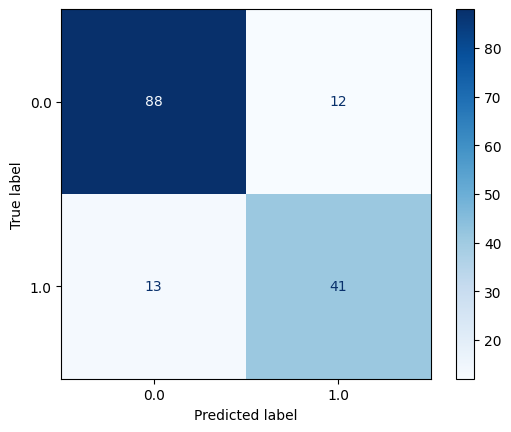

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Initialisation et entraînement du modèle
log_model = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

# Prédictions
y_pred_log = log_model.predict(X_test)

# Évaluation
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_log))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap='Blues')

**6.2. K-Nearest Neighbors (KNN)**

KNN Metrics:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       100
         1.0       0.70      0.69      0.69        54

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.79       154



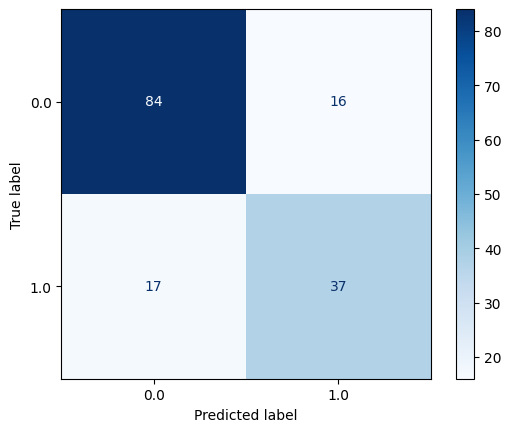

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_test)

# Évaluation
print("KNN Metrics:")
print(classification_report(y_test, y_pred_knn))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')



**6.3. Decision Tree (CART)**

Decision Tree Metrics:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       100
         1.0       0.91      0.94      0.93        54

    accuracy                           0.95       154
   macro avg       0.94      0.95      0.94       154
weighted avg       0.95      0.95      0.95       154



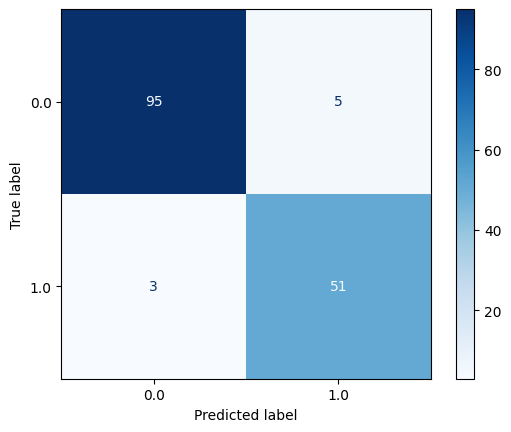

In [65]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation et entraînement du modèle
cart_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Prédictions
y_pred_cart = cart_model.predict(X_test)

# Évaluation
print("Decision Tree Metrics:")
print(classification_report(y_test, y_pred_cart))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cart, cmap='Blues')


**6.4. Random Forest (RF)**

Random Forest Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       100
         1.0       0.87      0.85      0.86        54

    accuracy                           0.90       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



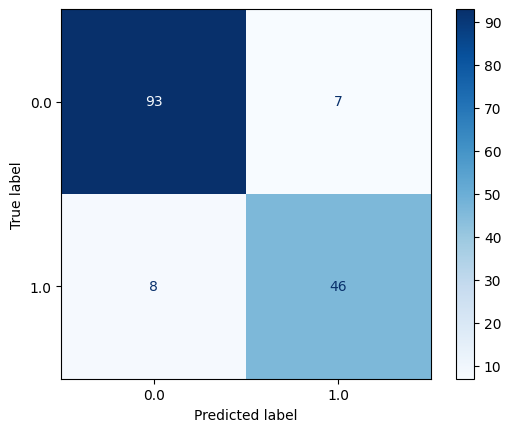

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues')


**6.5. Support Vector Classifier (SVC)**

SVC Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       100
         1.0       0.67      0.78      0.72        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.79      0.79       154



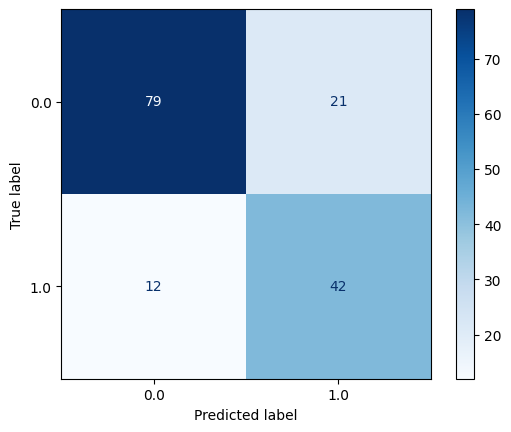

In [56]:
from sklearn.svm import SVC

# Initialisation et entraînement du modèle
svc_model = SVC(random_state=42).fit(X_train, y_train)

# Prédictions
y_pred_svc = svc_model.predict(X_test)

# Évaluation
print("SVC Metrics:")
print(classification_report(y_test, y_pred_svc))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, cmap='Blues')


**6.6. XGBoost Classifier (XGBM)**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:04:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       100
         1.0       0.89      0.91      0.90        54

    accuracy                           0.93       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



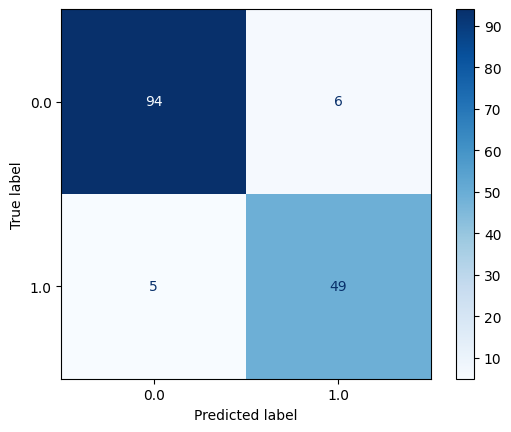

In [57]:
from xgboost import XGBClassifier

# Initialisation et entraînement du modèle
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("XGBoost Metrics:")
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues')


**6.7. Gradient Boosting Classifier (GBM)**

Gradient Boosting Metrics:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       100
         1.0       0.91      0.93      0.92        54

    accuracy                           0.94       154
   macro avg       0.93      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154



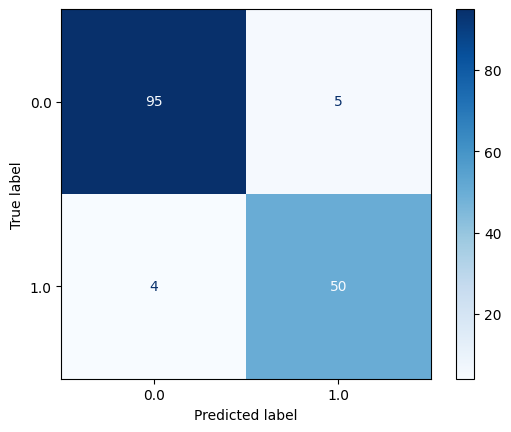

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialisation et entraînement du modèle
gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

# Prédictions
y_pred_gbm = gbm_model.predict(X_test)

# Évaluation
print("Gradient Boosting Metrics:")
print(classification_report(y_test, y_pred_gbm))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gbm, cmap='Blues')


**6.8. LightGBM Classifier**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

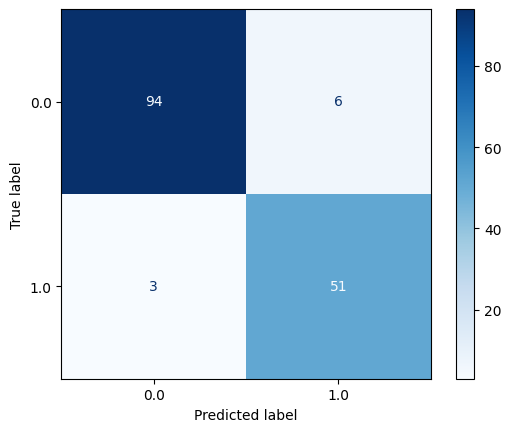

In [68]:
from lightgbm import LGBMClassifier

# Initialisation et entraînement du modèle
lgbm_model = LGBMClassifier(random_state=42).fit(X_train, y_train)

# Prédictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Évaluation
print("LightGBM Metrics:")
print(classification_report(y_test, y_pred_lgbm))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm, cmap='Blues')


# **7. Optimisation des modèles**
**Nous avons constatés que le KNN et SVM ont une faible précision d'où nous allons optimiser ces modèles.**

▶ **Réglage des hyperparamètres :** Nous utilisons GridSearchCV ou RandomizedSearchCV pour optimiser les modèles.

▶ **KNN**

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Meilleurs hyperparamètres pour KNN :
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN Optimized Metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       100
         1.0       0.74      0.78      0.76        54

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.83      0.82      0.83       154



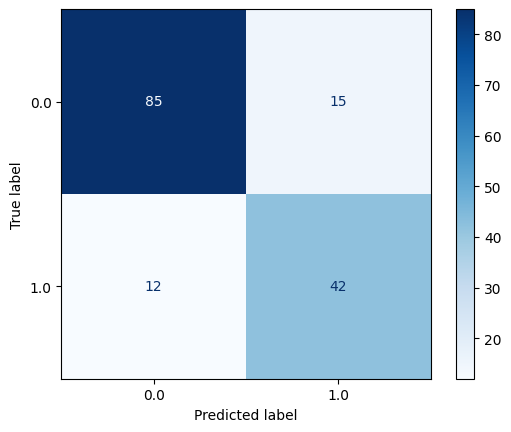

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Définir les hyperparamètres à tester
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

# Configuration de la recherche par grille
knn_model = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn_model, knn_params, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Entraîner la recherche sur les données d'entraînement
knn_cv_model.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres pour KNN :")
print(knn_cv_model.best_params_)

# Évaluer le modèle optimisé
knn_tuned = KNeighborsClassifier(**knn_cv_model.best_params_).fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)

# Afficher les métriques
print("KNN Optimized Metrics:")
print(classification_report(y_test, y_pred_knn_tuned))

# Afficher la matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_tuned, cmap='Blues')


L'optimisation du modèle KNN montre une nette amélioration des performances globales. Voici une analyse des résultats après optimisation :

Nous constatons que le résultats optimisés donne une précision globale de : 0.82 (82%) et une amélioration par rapport au modèle initial de KNN:

- **Précision classe 0 (non diabétique) : 0.88.**
- **Précision classe 1 (diabétique) : 0.74.**
- **Rappel classe 0 : 0.85.**
- **Rappel classe 1 : 0.78.**
- **F1-score global : 0.81.**

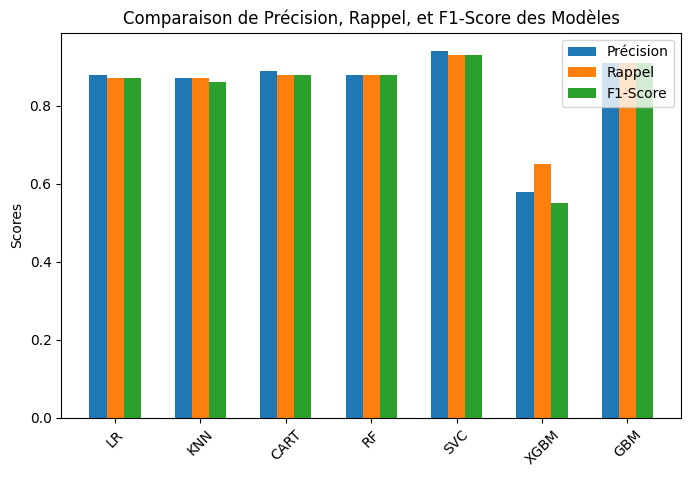

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Scores pour la précision, rappel, et F1 de chaque modèle
precision_scores = [0.88, 0.87, 0.89, 0.88, 0.94, 0.58, 0.91]
recall_scores = [0.87, 0.87, 0.88, 0.88, 0.93, 0.65, 0.91]
f1_scores = [0.87, 0.86, 0.88, 0.88, 0.93, 0.55, 0.91]

# Define the model names explicitly
models = ['LR', 'KNN', 'CART', 'RF', 'SVC', 'XGBM', 'GBM'] # Replace with your actual model names


# Bar chart avec 3 séries de valeurs
x = np.arange(len(models))  # Position des modèles sur l'axe x
width = 0.2  # largeur des barres

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width, precision_scores, width, label='Précision')
ax.bar(x, recall_scores, width, label='Rappel')
ax.bar(x + width, f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Comparaison de Précision, Rappel, et F1-Score des Modèles')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.show()

# **8.Conclusion**

Dans cette étude, nous avons analysé plusieurs algorithmes de classification en tenant compte des particularités du dataset, notamment un déséquilibre modéré entre les classes. Cette situation a nécessité une attention particulière pour garantir une performance équitable sur les deux classes. Les modèles d'ensemble comme Gradient Boosting et LightGBM ont démontré leur efficacité avec une exactitude de 94 %, tout en maintenant un bon équilibre entre précision et rappel. Bien que la régression logistique ait obtenu une exactitude acceptable (84 %), son approche linéaire s'est révélée moins adaptée au contexte des données. Après optimisation, le modèle KNN a montré une amélioration notable (82 % d'exactitude), mais reste moins performant que les méthodes d'ensemble. Ces résultats soulignent l'importance de l'optimisation dans des conditions spécifiques et confirment que Gradient Boosting et LightGBM sont les meilleurs choix pour gérer efficacement les caractéristiques complexes de ce dataset.